**CAR PRICE PREDICTION WITH MACHINE LEARNING**

In [ ]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv'
car = pd.read_csv(url,index_col=0)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: >

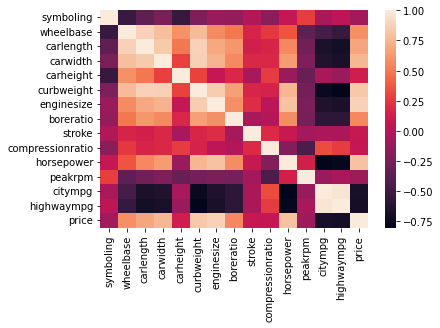

In [ ]:
sns.heatmap(car.corr())

<ipython-input-38-c093081fefa9>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




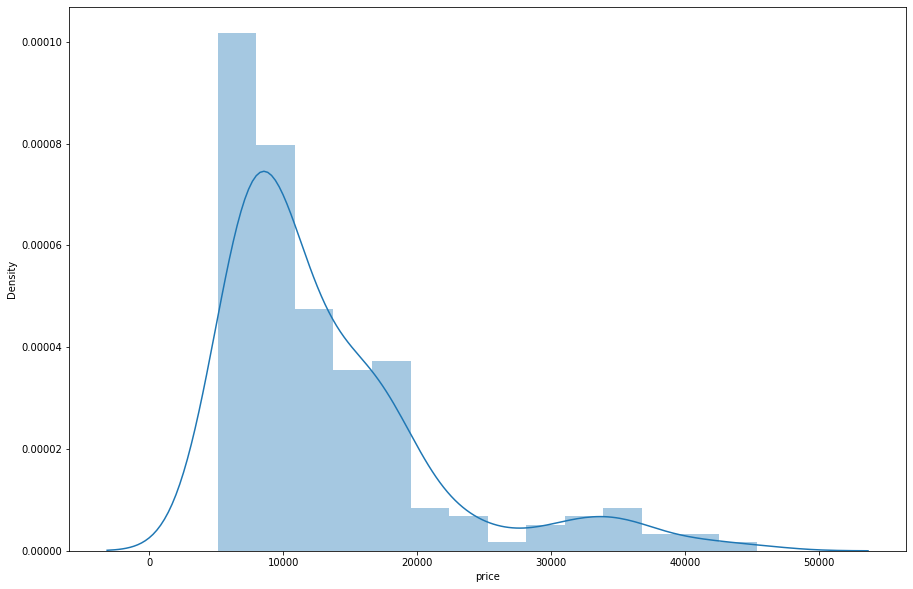

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(car.price)
plt.show()

In [ ]:
x1 = car[["symboling", "wheelbase", "carlength", "carwidth", "carheight", "enginesize", "boreratio", 
          "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]]
y1 = car['price']             

In [ ]:
print(x1)

        symboling  wheelbase  carlength  carwidth  carheight  enginesize  \
car_ID                                                                     
1               3       88.6      168.8      64.1       48.8         130   
2               3       88.6      168.8      64.1       48.8         130   
3               1       94.5      171.2      65.5       52.4         152   
4               2       99.8      176.6      66.2       54.3         109   
5               2       99.4      176.6      66.4       54.3         136   
...           ...        ...        ...       ...        ...         ...   
201            -1      109.1      188.8      68.9       55.5         141   
202            -1      109.1      188.8      68.8       55.5         141   
203            -1      109.1      188.8      68.9       55.5         173   
204            -1      109.1      188.8      68.9       55.5         145   
205            -1      109.1      188.8      68.9       55.5         141   

        bor

In [ ]:
print(y1)

car_ID
1      13495.0
2      16500.0
3      16500.0
4      13950.0
5      17450.0
        ...   
201    16845.0
202    19045.0
203    21485.0
204    22470.0
205    22625.0
Name: price, Length: 205, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3,random_state=0)

In [ ]:
x_train.shape

(143, 13)

In [ ]:
x_test.shape

(62, 13)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
y_test

car_ID
53      6795.0
182    15750.0
6      15250.0
19      5151.0
189     9995.0
        ...   
199    18420.0
144     9960.0
25      6229.0
31      6479.0
136    15510.0
Name: price, Length: 62, dtype: float64

In [ ]:
y_pred

array([ 6293.03823847, 19288.41048301, 16324.07611347, -1879.86836145,
       11987.29820619, 13799.0548626 ,  5577.46289989,  6000.25030504,
       22639.68520575,  8191.41555671, 16585.1632182 , 36589.01609331,
       10269.17653414, 14491.15197905,  4854.17813389, 13799.0548626 ,
       10287.03149587, 19101.00197457,  9703.8736105 ,  6461.11140206,
       11497.25803722, 18280.05159549, 10933.03880121, 13799.0548626 ,
       22888.98240843,  8619.92474249,  6518.83187139, 18472.85974143,
        6637.34443429,  6213.52623458, 10515.3359717 , 10680.60779551,
       21297.83318119,  8059.76592461,  6213.52623458, 26405.51314573,
       11430.76101938, 17991.73870213,  6708.94057553, 38745.05714029,
        5315.5318772 , 16223.94224506, 30872.04902955, 19615.74070603,
       10957.38481327,  6598.23994808,  6674.90204437, 15493.966228  ,
        9675.92742835, 10515.3359717 , 19374.42924226,  6557.95027357,
        5823.96817343, 10057.41281265, 19578.37428411, 22700.0704682 ,
      

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

3421.121509356688


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8227659233703783


In [ ]:
print('Slope:' , model.coef_)
print('Intercept:' , model.intercept_)

Slope: [ 4.61353743e+02  2.22053937e+02 -9.88632508e+01  5.85480223e+02
  1.70192656e+02  1.09741485e+02 -1.03607912e+03 -3.47576528e+03
  3.93047914e+02  4.06879883e+01  2.13792554e+00 -5.02762857e+02
  2.84324873e+02]
Intercept: -54018.6803985911
